In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [80]:
csv_file_path = 'extracted_data/extracted_voltage_data_3.6.csv'

df = pd.read_csv(csv_file_path)

df.shape

(111, 52)

In [96]:
X = df.iloc[:, :-2]
y = df['Capacity'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (99, 50)
X_test shape: (12, 50)
y_train shape: (99,)
y_test shape: (12,)


In [97]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#y_train_scaled = scaler.fit_transform(X_train)
#y_test_scaled = scaler.transform(X_test)

In [92]:
y_train

0      1.782800
81     1.701923
18     1.665415
70     1.540989
56     1.544159
         ...   
106    0.777912
14     0.483638
92     0.594002
51     1.771600
102    1.404209
Name: Capacity, Length: 99, dtype: float64

In [98]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

In [99]:
model.compile(optimizer='adam', loss=tf.compat.v1.losses.mean_squared_error)

In [100]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/100
3/3 - 4s - loss: 5.5458 - val_loss: 2.2720 - 4s/epoch - 1s/step
Epoch 2/100
3/3 - 0s - loss: 2.8771 - val_loss: 2.8474 - 120ms/epoch - 40ms/step
Epoch 3/100
3/3 - 0s - loss: 1.4568 - val_loss: 0.2524 - 208ms/epoch - 69ms/step
Epoch 4/100
3/3 - 0s - loss: 0.9291 - val_loss: 0.9992 - 211ms/epoch - 70ms/step
Epoch 5/100
3/3 - 0s - loss: 1.4987 - val_loss: 0.3588 - 211ms/epoch - 70ms/step
Epoch 6/100
3/3 - 0s - loss: 0.6828 - val_loss: 0.6900 - 214ms/epoch - 71ms/step
Epoch 7/100
3/3 - 0s - loss: 0.8420 - val_loss: 1.0921 - 199ms/epoch - 66ms/step
Epoch 8/100
3/3 - 0s - loss: 0.8328 - val_loss: 0.4248 - 207ms/epoch - 69ms/step
Epoch 9/100
3/3 - 0s - loss: 0.4850 - val_loss: 0.2712 - 186ms/epoch - 62ms/step
Epoch 10/100
3/3 - 0s - loss: 0.6964 - val_loss: 0.3005 - 224ms/epoch - 75ms/step
Epoch 11/100
3/3 - 0s - loss: 0.6275 - val_loss: 0.2849 - 185ms/epoch - 62ms/step
Epoch 12/100
3/3 - 0s - loss: 0.5249 - val_loss: 0.5249 - 112ms/epoch - 37ms/step
Epoch 13/100
3/3 - 0s - loss: 

In [101]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
accuracy = 1 - loss
print(f"Accuracy: {accuracy}")

1/1 [==============================] - 0s 61ms/step - loss: 0.2401
Test Loss: 0.24014444649219513
Accuracy: 0.7598555535078049


In [102]:
# Assuming y_test is a Pandas DataFrame
y_test_values = y_test.to_numpy().flatten()

# Get model predictions
predictions = model.predict(X_test).flatten()

# Print y_test, predictions, and the difference side by side
for true_value, predicted_value in zip(y_test_values, predictions):
    difference = true_value - predicted_value
    print(f'True Value: {true_value:.2f}  |  Predicted Value: {predicted_value:.2f}  |  Difference: {difference:.2f}')


1/1 [==============================] - 0s 395ms/step
True Value: 0.52  |  Predicted Value: 1.30  |  Difference: -0.78
True Value: 0.99  |  Predicted Value: 1.30  |  Difference: -0.31
True Value: 1.62  |  Predicted Value: 1.30  |  Difference: 0.32
True Value: 1.63  |  Predicted Value: 1.30  |  Difference: 0.34
True Value: 1.73  |  Predicted Value: 1.30  |  Difference: 0.43
True Value: 1.61  |  Predicted Value: 1.30  |  Difference: 0.31
True Value: 0.60  |  Predicted Value: 1.30  |  Difference: -0.70
True Value: 0.70  |  Predicted Value: 1.30  |  Difference: -0.60
True Value: 1.70  |  Predicted Value: 1.30  |  Difference: 0.40
True Value: 0.80  |  Predicted Value: 1.30  |  Difference: -0.50
True Value: 1.79  |  Predicted Value: 1.30  |  Difference: 0.49
True Value: 1.72  |  Predicted Value: 1.30  |  Difference: 0.42


In [56]:
model.predict(X_test)

1/1 [==============================] - 0s 62ms/step


array([[2.6437926],
       [2.6436043],
       [2.6436803],
       [2.6438177],
       [2.6436932],
       [2.6438186],
       [2.643614 ],
       [2.643766 ],
       [2.643665 ],
       [2.6437173],
       [2.643766 ],
       [2.643982 ],
       [2.6438334],
       [2.6438172],
       [2.6436808]], dtype=float32)

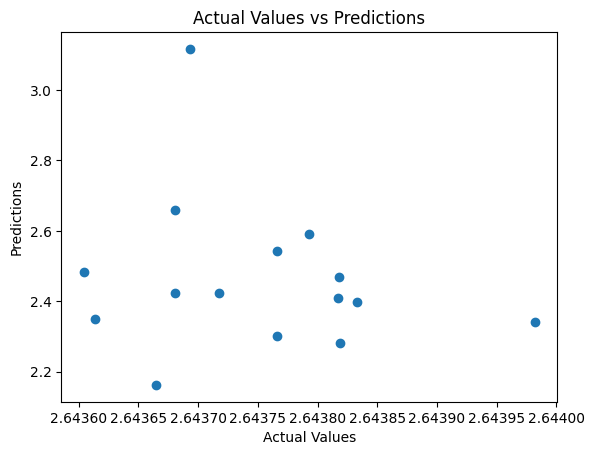

In [55]:

# Plot actual values vs predictions
plt.scatter(predictions, y_test_values)
plt.ylabel('Predictions')
plt.xlabel('Actual Values')
plt.title('Actual Values vs Predictions')

plt.show()